AIM 9week exercise

instructor: JaKeoung Koo at Gachon University

# 1. Convergence of gradient descent

86.85516896350443
[43.42758448175221, 86.85516896350443, 173.71033792700885]
0.023026839091642062
0.011513419545821031
0.005756709772910516


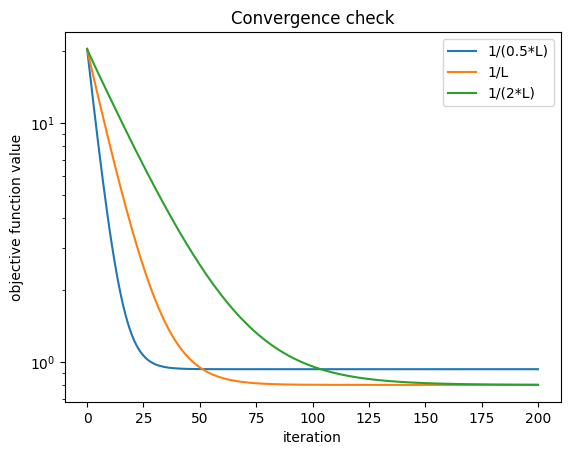

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix A
A = np.array([[-1, 2], [3, 4], [5, 6]])

# Define the vector b
b = np.array([7, 8, 9])

# Define the function to minimize
def f(x):
    return np.sum(0.5*(A.dot(x) - b)**2)

# Define the gradient of the function
def grad_f(x):
    return A.T.dot(A.dot(x) - b)

# Define the Lipschitz constant of the gradient
L = np.linalg.eigvals(A.T.dot(A))[-1]
print(L)

# Define the initial point
x0 = np.array([1.0, 1.0])

# Define the number of iterations
niter = 200

# Set the list of Lipschitz constant to be used
LL = [0.5*L, L, 2*L]
print(LL)

plt.title(f"Convergence check")
plt.ylabel("objective function value")
plt.xlabel("iteration")

for L in LL:
  eta = 1.0 / L
  print(eta)
  x = x0.copy()

  # Store the history of iterates for plotting
  x_hist = [x0]
  f_hist = [f(x0)]

  for i in range(niter):
    x = x - eta * grad_f(x)
    x_hist.append(x)
    f_hist.append(f(x))

  plt.semilogy(f_hist)

plt.legend(["1/(0.5*L)", "1/L", "1/(2*L)"])

# 2. GD v.s. SGD v.s. Minibatch GD

Note that
$$\frac{1}{2}\|Ax-b\|_2^2 = \frac{1}{2} \sum_{i=1}^N (A_{i:}x-b_i)^2$$
where $A_{i:}$ is the $i$-th row of the matrix $A$.

batchsize: 2, niter_per_epoch: 3, nepoch: 333


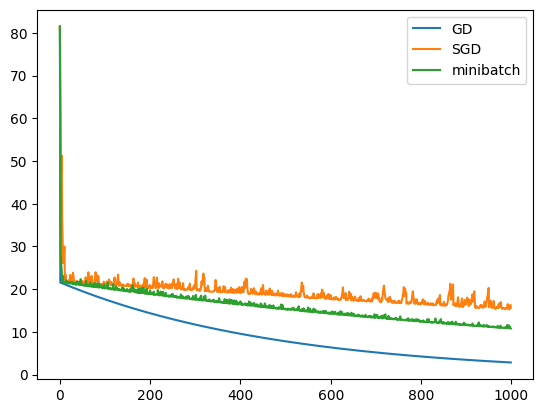

In [ ]:
# Define the matrix A of size [N x dim]
A = np.array([[1, 2], [3, 4], [5, 6], [7,8], [8,9], [10,11]])
N = A.shape[0] # N is the number of data

# Define the vector b
b = np.array([7, 8, 9, 10, 11, 12])

# Define the function to minimize
def f(x):
    return np.sum(0.5*(A.dot(x) - b)**2)

# Define the gradient of the function
def grad_f(x, B=None):
  if B is None:
    return A.T.dot(A.dot(x)-b)
  else:
    return A[B,:].T.dot(A[B,:].dot(x) - b[B])

L = np.linalg.eigvals(A.T.dot(A))[-1]
eta = 1.0 / L
niter = 999

methods = ["GD", "SGD", "minibatch"]
for imethod,method in enumerate(methods):
  x = x0.copy()

  # Store the history of iterates for plotting
  x_hist = [x0]
  f_hist = [f(x0)]

  if method == "GD":
    for i in range(niter):
      x = x - eta * grad_f(x)
      x_hist.append(x)
      f_hist.append(f(x))

  elif method == "SGD":
    for i in range(niter):
      x = x - eta * grad_f(x, np.random.randint(N))
      x_hist.append(x)
      f_hist.append(f(x))

  elif method == "minibatch":
    # nepoch * (N/batchsize) = niter
    batchsize = 2
    niter_per_epoch = N // batchsize
    nepoch = niter // niter_per_epoch

    eta2 = eta*2

    print(f"batchsize: {batchsize}, niter_per_epoch: {niter_per_epoch}, nepoch: {nepoch}")

    for epoch in range(nepoch):
      Nperm = np.random.permutation(N)
      for j in range(niter_per_epoch):
        idx_chosen = Nperm[j*batchsize:(j+1)*batchsize]
        x = x - eta2 * grad_f(x, idx_chosen) / batchsize
        x_hist.append(x)
        f_hist.append(f(x))


  plt.plot(f_hist)

plt.legend(methods)